In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
import requests
import re

from bs4 import BeautifulSoup

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_Asian_Americans_and_Pacific_Islands_Americans_in_the_United_States_Congress"

response = requests.get(url)
doc = BeautifulSoup(response.text)  

In [4]:
rows = []
senators = doc.find_all("tbody")[0]
for senator in senators:
    row = {}
    try:
        row['name'] = senator.find_all('span')[1].text
    except:
        pass
    try:
        row['start_date'] = senator.find_all('span')[4].text
    except:
        pass
    try:
        row['end_date'] = senator.find_all('span')[5].text
    except:
        pass
#         row['start_date'] = senator.find()
    rows.append(row)

In [5]:
rows

[{},
 {},
 {'name': 'Hiram Fong',
  'start_date': 'August 21, 1959',
  'end_date': 'January 3, 1977'},
 {},
 {'name': 'Daniel Inouye',
  'start_date': 'January 3, 1963',
  'end_date': 'December 17, 2012'},
 {},
 {'name': 'S. I. Hayakawa',
  'start_date': 'January 2, 1977',
  'end_date': 'January 3, 1983'},
 {},
 {'name': 'Spark Matsunaga',
  'start_date': 'January 3, 1977',
  'end_date': 'April 15, 1990'},
 {},
 {'name': 'Daniel Akaka',
  'start_date': 'May 16, 1990',
  'end_date': 'January 3, 2013'},
 {},
 {'name': 'John Ensign',
  'start_date': 'January 3, 2001',
  'end_date': 'May 3, 2011'},
 {},
 {'name': 'Mazie Hirono', 'start_date': 'January 3, 2013'},
 {},
 {'name': 'Tammy Duckworth',
  'start_date': '(born 1968)',
  'end_date': 'January 3, 2017'},
 {},
 {'name': 'Kamala Harris', 'start_date': 'January 3, 2017'}]

In [6]:
df = pd.DataFrame(rows)

In [7]:
df = df.dropna(subset=["name"]).reset_index()

In [8]:
df = df[['name','start_date','end_date']]

In [9]:
df

,name,start_date,end_date
0,Hiram Fong,"August 21, 1959","January 3, 1977"
1,Daniel Inouye,"January 3, 1963","December 17, 2012"
2,S. I. Hayakawa,"January 2, 1977","January 3, 1983"
3,Spark Matsunaga,"January 3, 1977","April 15, 1990"
4,Daniel Akaka,"May 16, 1990","January 3, 2013"
5,John Ensign,"January 3, 2001","May 3, 2011"
6,Mazie Hirono,"January 3, 2013",NaN
7,Tammy Duckworth,(born 1968),"January 3, 2017"
8,Kamala Harris,"January 3, 2017",NaN


In [10]:
df['start_date'].replace(
    to_replace=['(born 1968)'],
    value='January 3, 2017',
    inplace=True
)

In [11]:
df['end_date'].replace(
    to_replace=['January 3, 2017'],
    value=['December 30, 2020'],
    inplace=True 
)
    

In [12]:
df = df.fillna("December 30, 2020")

In [13]:
df['start_date'] = df['start_date'].str.extract(r", (.*)")
df['end_date'] = df['end_date'].str.extract(r", (.*)")

In [14]:
# df['start_date'] = pd.to_datetime(df['start_date'].str.strip(), format='%B %d, %Y', errors='coerce')

In [15]:
# df['end_date'] = pd.to_datetime(df['end_date'].str.strip(), format='%B %d, %Y', errors='coerce')

In [16]:
df['start_date'] = df['start_date'].astype(int)
df['end_date'] = df['end_date'].astype(int)

In [22]:
df = df.sort_values(by='start_date', ascending=False)

In [25]:
# fig, ax = plt.subplots()
# df.reset_index().plot(ax =ax, x='start_date', y= 'index', style='o')
# ax.set_xlim([1955,2020])
df

,name,start_date,end_date
7,Tammy Duckworth,2017,2020
8,Kamala Harris,2017,2020
6,Mazie Hirono,2013,2020
5,John Ensign,2001,2011
4,Daniel Akaka,1990,2013
2,S. I. Hayakawa,1977,1983
3,Spark Matsunaga,1977,1990
1,Daniel Inouye,1963,2012
0,Hiram Fong,1959,1977


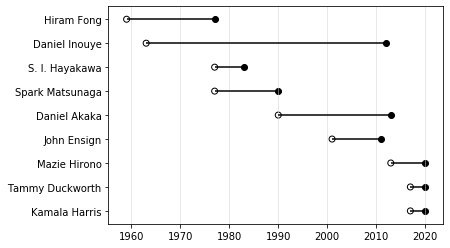

In [26]:
fig, ax = plt.subplots()
ax.hlines(xmin=df['start_date'], xmax=df['end_date'], y=df.index)
ax.scatter(x=df['start_date'], y=df.index, facecolors='none', edgecolors='black')
ax.scatter(x=df['end_date'], y=df.index,color='black')
ax.set_yticks(df.index)
ax.yaxis.set_ticklabels(df['name'])
ax.grid('on', axis='x', which='major', linestyle='-', linewidth='0.5', color='lightgrey')
ax.invert_yaxis()
plt.savefig("Senator.svg",bbox_inches = 'tight')